In [5]:
## 1. Préparation des données
    ## 1.1 Charger les données du train
    ## 1.2 Normalisation
    ## 1.4 Remodeler
    ## 1.5 Encodage des étiquettes
    
## 2. CNN
    ## 2.1 Définir le modèle
    ## 2.2 Définir l'optimiseur et le recuit
## 3. Évaluez le modèle
    ## 3.1 Courbes de formation et de validation
    ## 3.2 Matrice de confusion
## 4. Prédiction et soumission
    ## 4.1 Données de test de charge
    ## 4.1 Prédire et soumettre les résultats

In [370]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
import seaborn as sns
%matplotlib inline



In [371]:
data_train = pd.read_csv('train.csv')
data_test= pd.read_csv('test.csv')
sample_submission = pd.read_csv('submission.csv')

In [372]:
data_train.head()
data_train.shape

(42000, 785)

In [373]:
train_labels=data_train['label']

train_images=data_train.drop('label',axis=1)
train_images=train_images/255.0

X_data_test=data_test/255.0
X_data_test = X_data_test.values.reshape(X_data_test.shape[0], 28, 28, 1)


In [374]:
X_train=train_images[:27000]
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)

Y_train=train_labels[:27000]
Y_train = to_categorical(Y_train, 10)


Y_valid=train_labels[27000:]
Y_valid = to_categorical(Y_valid, 10)


X_valid=train_images[27000:]
X_valid = X_valid.values.reshape(X_valid.shape[0], 28, 28, 1)


X_train.shape


(27000, 28, 28, 1)

In [480]:
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers import Dense, Activation, Flatten
import numpy 
seed = 8
numpy.random.seed(seed)

model=models.Sequential()

model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
...
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
...
model.add(Conv2D(64, (3, 3), padding="same", activation="softmax"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
...
model.add(Flatten())
...
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))

In [481]:
optim = optimizers.Adam(lr=0.001, epsilon=0.0000001, decay=0.0)
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [482]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
# With data augmentation to prevent overfitting (accuracy 0.99286)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


In [483]:
datagen.fit(X_train)

In [484]:
history=model.fit_generator(datagen.flow(X_train, Y_train, batch_size=86), epochs=100, validation_data=(X_valid,Y_valid),verbose = 2, steps_per_epoch=X_train.shape[0] // 86,callbacks=[learning_rate_reduction])

Epoch 1/100
 - 36s - loss: 1.7688 - acc: 0.3815 - val_loss: 0.6188 - val_acc: 0.8657
Epoch 2/100
 - 33s - loss: 0.9391 - acc: 0.6941 - val_loss: 0.2616 - val_acc: 0.9347
Epoch 3/100
 - 33s - loss: 0.6539 - acc: 0.7936 - val_loss: 0.1714 - val_acc: 0.9530
Epoch 4/100
 - 33s - loss: 0.5323 - acc: 0.8339 - val_loss: 0.1398 - val_acc: 0.9588
Epoch 5/100
 - 33s - loss: 0.4593 - acc: 0.8580 - val_loss: 0.1105 - val_acc: 0.9665
Epoch 6/100
 - 33s - loss: 0.4110 - acc: 0.8773 - val_loss: 0.0941 - val_acc: 0.9713
Epoch 7/100
 - 33s - loss: 0.3710 - acc: 0.8882 - val_loss: 0.0841 - val_acc: 0.9752
Epoch 8/100
 - 33s - loss: 0.3464 - acc: 0.8976 - val_loss: 0.0789 - val_acc: 0.9764
Epoch 9/100
 - 33s - loss: 0.3205 - acc: 0.9050 - val_loss: 0.0803 - val_acc: 0.9749
Epoch 10/100
 - 33s - loss: 0.3119 - acc: 0.9083 - val_loss: 0.0684 - val_acc: 0.9790
Epoch 11/100
 - 33s - loss: 0.2938 - acc: 0.9142 - val_loss: 0.0702 - val_acc: 0.9787
Epoch 12/100
 - 33s - loss: 0.2833 - acc: 0.9174 - val_loss: 0.

Epoch 90/100
 - 33s - loss: 0.1797 - acc: 0.9511 - val_loss: 0.0360 - val_acc: 0.9888
Epoch 91/100
 - 33s - loss: 0.1755 - acc: 0.9509 - val_loss: 0.0360 - val_acc: 0.9889
Epoch 92/100
 - 33s - loss: 0.1806 - acc: 0.9512 - val_loss: 0.0360 - val_acc: 0.9889
Epoch 93/100
 - 33s - loss: 0.1722 - acc: 0.9528 - val_loss: 0.0361 - val_acc: 0.9889
Epoch 94/100
 - 33s - loss: 0.1809 - acc: 0.9509 - val_loss: 0.0359 - val_acc: 0.9890
Epoch 95/100
 - 33s - loss: 0.1769 - acc: 0.9521 - val_loss: 0.0358 - val_acc: 0.9890
Epoch 96/100
 - 33s - loss: 0.1833 - acc: 0.9500 - val_loss: 0.0358 - val_acc: 0.9889
Epoch 97/100
 - 34s - loss: 0.1836 - acc: 0.9505 - val_loss: 0.0360 - val_acc: 0.9888
Epoch 98/100
 - 34s - loss: 0.1735 - acc: 0.9531 - val_loss: 0.0359 - val_acc: 0.9890
Epoch 99/100
 - 33s - loss: 0.1720 - acc: 0.9526 - val_loss: 0.0360 - val_acc: 0.9889
Epoch 100/100
 - 33s - loss: 0.1860 - acc: 0.9499 - val_loss: 0.0360 - val_acc: 0.9888


In [405]:
results=model.evaluate(X_valid,Y_valid)
results

15000/15000 [==============================] - 6s 377us/step


[0.029343545228057096, 0.9920666666666667]

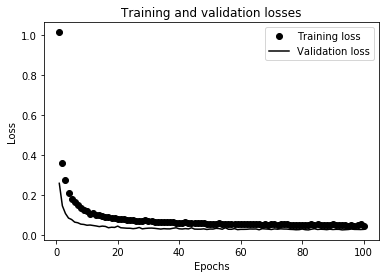

In [406]:
nb_epochs=100
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1,nb_epochs+1)
plt.plot(epochs,training_loss, 'ko', label = 'Training loss')
plt.plot(epochs,validation_loss, 'k', label = 'Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title("Training and validation losses")
plt.legend()
plt.show()

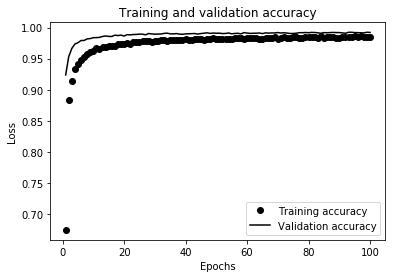

In [407]:
training_accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']

epochs = range(1,nb_epochs+1)
plt.plot(epochs,training_accuracy, 'ko', label = 'Training accuracy')
plt.plot(epochs,validation_accuracy, 'k', label = 'Validation accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

In [408]:
pred_val_cnn1=model.predict_classes(X_valid)
pred_val_cnn1


def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')



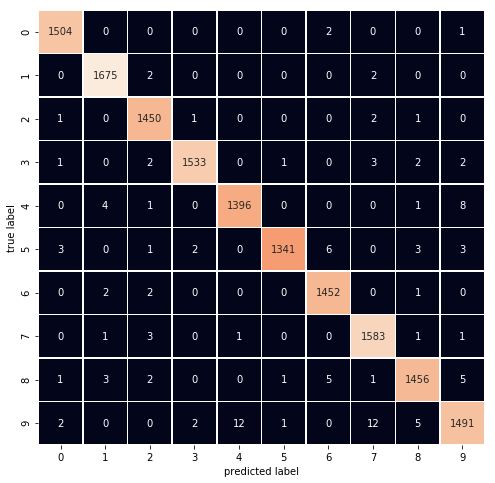

In [409]:
y_val_=train_labels[27000:]
plot_confusion_matrix(y_val_, pred_val_cnn1)

In [410]:
print(classification_report(y_val_, pred_val_cnn1))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00      1507
          1       0.99      1.00      1.00      1679
          2       0.99      1.00      0.99      1455
          3       1.00      0.99      0.99      1544
          4       0.99      0.99      0.99      1410
          5       1.00      0.99      0.99      1359
          6       0.99      1.00      0.99      1457
          7       0.99      1.00      0.99      1590
          8       0.99      0.99      0.99      1474
          9       0.99      0.98      0.98      1525

avg / total       0.99      0.99      0.99     15000



In [411]:
pred_val_cnn=model.predict_classes(X_data_test)
pred_val_cnn

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [412]:
result_svm = pd.DataFrame({'ImageId':sample_submission.ImageId, 'Label':pred_val_cnn})

In [413]:
result_svm.to_csv("submM2ISE.csv",index=False)